# Block 37: Workshop (Solution)
## Image Classification of Fashion Items


## Scenario:
Fashion retailers globally are constantly seeking ways to improve their online shopping experience. One of the key challenges they face is accurately categorizing and tagging items based on their images. This is vital not only for internal product management but also for enhancing user experience. For instance, when a shopper searches for 'blue jeans', the retailer's website should be able to show all relevant items. To achieve this, the retailer requires a robust image classification system. 

### Objective:
Develop a machine learning model to accurately classify fashion items based on their images into predefined categories.

### Dataset:
You will use the Fashion MNIST dataset. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at a low resolution (28 by 28 pixels). Though the dataset is available on the GitHub repository, it's also widely available on Kaggle. You can download it directly from Kaggle's Fashion MNIST page.

### Categories:
T-shirt/top,
Trouser,
Pullover,
Dress,
Coat,
Sandal,
Shirt,
Sneaker,
Bag,
Ankle boot

### Directions to Solve:
- Data Exploration: Explore the Fashion MNIST dataset to understand its structure, data types, and distributions.

- Data Preprocessing: Normalize the images, handle missing values (if any), and split the data into training and test sets.

- Model Building: Use TensorFlow and Keras to design a deep learning model suitable for image classification. Consider using Convolutional Neural Networks (CNN) as they have proven to be effective for image data.

- Training: Train the model using the training dataset. Monitor the training loss and accuracy.

- Evaluation: Evaluate the model's performance on the test dataset. Calculate metrics such as accuracy, precision, recall, and F1 score.

- Optimization: If the model's performance is not satisfactory, consider techniques like data augmentation, changing the model architecture, or using different optimizers to enhance performance.

- Deployment: Once satisfied, consider deploying the model as a web service or integrating it into the retailer's existing system.


## Dataset:
The dataset can be downloaded from [Kaggle's Fashion MNIST page](https://www.kaggle.com/zalando-research/fashionmnist).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-19 19:06:29.511272: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-19 19:07:06.127723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 19:08:36.203361: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


1. Load the dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

2. Display the first few images.

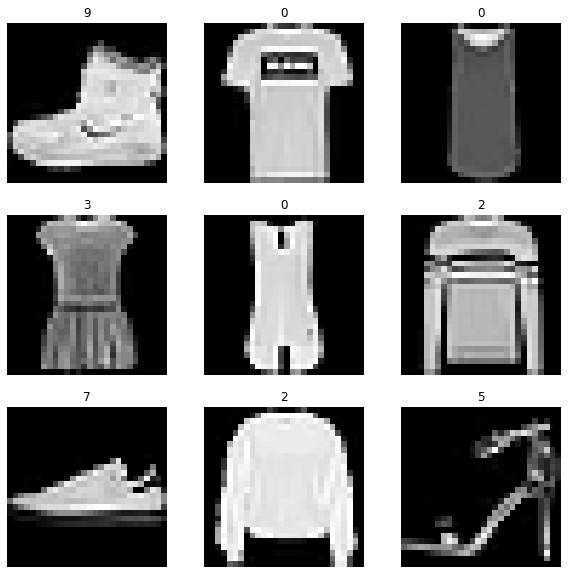

In [3]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

3. Normalize the images

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

4. Reshape the data to include the channel dimension.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

5. Build the model.

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

6. Compile the model.

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

7. Train the model.

In [13]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 22s 11ms/step - loss: 0.3952 - accuracy: 0.8604 - val_loss: 0.3239 - val_accuracy: 0.8807
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2710 - accuracy: 0.9018 - val_loss: 0.2725 - val_accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2248 - accuracy: 0.9178 - val_loss: 0.2526 - val_accuracy: 0.9085
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1906 - accuracy: 0.9296 - val_loss: 0.2596 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1645 - accuracy: 0.9392 - val_loss: 0.2376 - val_accuracy: 0.9159
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1401 - accuracy: 0.9488 - val_loss: 0.2659 - val_accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1200 - accuracy: 0.9558 - val_loss: 0.2567 - val_accura

8. Evaluate the model.

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3182 - accuracy: 0.9161 - 1s/epoch - 4ms/step

Test accuracy: 0.916100025177002




## Training Result:
accuracy: 0.9184

This indicates that during the training phase, the model was able to correctly classify approximately 91.84% of the training samples. In other words, out of every 100 images from the training dataset, the model predicted the correct category for about 92 of them.
- 2s/epoch

This shows the average time taken for each epoch (one forward and backward pass of all the training samples) was 2 seconds. If you trained the model for, say, 10 epochs, it would have taken approximately 20 seconds in total for the training.
- 6ms/step

This represents the average time taken for each batch (or step) during training. If your batch size was, for example, 32 images, then every time the model processed those 32 images, it took an average of 6 milliseconds.
Test Result:
Test accuracy: 0.91839998960495

## Interpretation
The accuracy value represents how well the model performed on this unseen data. An accuracy of approximately 91.84% means that the model was able to correctly classify about 92 out of every 100 images from the test dataset.
Consistency between Training and Test Accuracy: The model's training and test accuracies are very close (both approximately 91.84%). This suggests that the model has generalized well to unseen data and is not overfitting. Overfitting occurs when a model performs exceptionally well on the training data but poorly on new, unseen data.
